<a href="https://www.kaggle.com/code/piyushjain572/handling-mixed-variables?scriptVersionId=199467866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv',usecols=['Cabin','Ticket','SibSp','Parch','Survived'])
df.head()

,Survived,SibSp,Parch,Ticket,Cabin
0,0,1,0,A/5 21171,NaN
1,1,1,0,PC 17599,C85
2,1,0,0,STON/O2. 3101282,NaN
3,1,1,0,113803,C123
4,0,0,0,373450,NaN


In [4]:
df['Family'] = df['SibSp'] + df['Parch']
df['Family'] = df['Family'].apply(lambda x:'A' if x == 0 else x)
df.drop(columns=['SibSp','Parch'],inplace=True)
df.sample(10)

,Survived,Ticket,Cabin,Family
641,1,PC 17477,B35,A
547,1,SC/PARIS 2146,NaN,A
247,1,250649,NaN,2
102,0,35281,D26,1
121,0,A4. 54510,NaN,A
185,0,113767,A32,A
436,0,W./C. 6608,NaN,4
826,0,1601,NaN,A
155,0,PC 17597,NaN,1
677,1,4138,NaN,A


In [5]:
df['Family'].unique()

array([1, 'A', 4, 2, 6, 5, 3, 7, 10], dtype=object)

Text(0.5, 1.0, 'Passengers Travelling with')

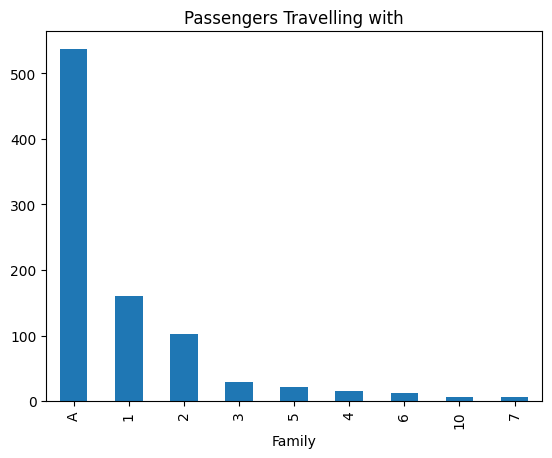

In [9]:
fig = df['Family'].value_counts().plot(kind='bar')
fig.set_title('Passengers Travelling with')

### *Here single col. has both numerical and categorical data. We will create new cols. for corresponding numerical and categorical values.*

In [10]:
#extracring numerical part
df['Family_numerical'] = pd.to_numeric(df['Family'],errors='coerce',downcast='integer')

In [14]:
#extracting categorical part
df['Family_Categorical'] = np.where(df['Family_numerical'].isnull(),df['Family'],np.NaN)

df.sample(15)

,Survived,Ticket,Cabin,Family,Family_numerical,Family_Categorical
42,0,349253,NaN,A,NaN,A
37,0,A./5. 2152,NaN,A,NaN,A
393,1,35273,D36,1,1.0,NaN
442,0,347076,NaN,1,1.0,NaN
887,1,112053,B42,A,NaN,A
721,0,350048,NaN,1,1.0,NaN
185,0,113767,A32,A,NaN,A
338,1,7598,NaN,A,NaN,A
385,0,S.O.C. 14879,NaN,A,NaN,A
404,0,315096,NaN,A,NaN,A


### *Lets move to next col. Cabin. Here again numerical and categorical are together in single col.*

In [15]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['Cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Survived,Ticket,Cabin,Family,Family_numerical,Family_Categorical,Cabin_num,Cabin_cat
0,0,A/5 21171,NaN,1,1.0,NaN,NaN,NaN
1,1,PC 17599,C85,1,1.0,NaN,85,C
2,1,STON/O2. 3101282,NaN,A,NaN,A,NaN,NaN
3,1,113803,C123,1,1.0,NaN,123,C
4,0,373450,NaN,A,NaN,A,NaN,NaN


<Axes: xlabel='Cabin_cat'>

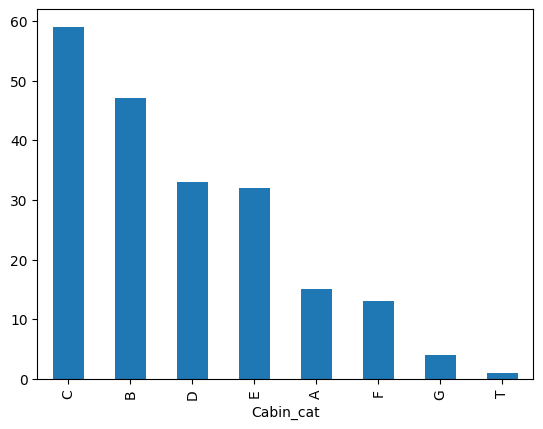

In [17]:
df['Cabin_cat'].value_counts().plot(kind='bar')

### *Now the last col. Ticket.*

In [19]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [23]:
#extract last bit of ticket as integer
df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors='coerce',downcast='integer')

In [24]:
#extract categorical part of ticket
df["Ticket_cat"] = df['Ticket'].apply(lambda s: s.split()[0])
df["Ticket_cat"] = np.where(df['Ticket_cat'].str.isdigit(), np.nan,
                              df['Ticket_cat'])
df.sample(20)

,Survived,Ticket,Cabin,Family,Family_numerical,Family_Categorical,Cabin_num,Cabin_cat,Ticket_num,Ticket_cat
826,0,1601,NaN,A,NaN,A,NaN,NaN,1601.0,NaN
392,0,3101277,NaN,2,2.0,NaN,NaN,NaN,3101277.0,NaN
290,1,19877,NaN,A,NaN,A,NaN,NaN,19877.0,NaN
108,0,349249,NaN,A,NaN,A,NaN,NaN,349249.0,NaN
516,1,C.A. 34260,F33,A,NaN,A,33,F,34260.0,C.A.
887,1,112053,B42,A,NaN,A,42,B,112053.0,NaN
616,0,347080,NaN,2,2.0,NaN,NaN,NaN,347080.0,NaN
365,0,C 7076,NaN,A,NaN,A,NaN,NaN,7076.0,C
782,0,113501,D6,A,NaN,A,6,D,113501.0,NaN
620,0,2659,NaN,1,1.0,NaN,NaN,NaN,2659.0,NaN


In [25]:
df['Ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)